In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
def top_percentuale(df, perc):
    length = df.shape[0]
    end = round(length * perc)
    return df[:end]

In [3]:
path = "./Df completi"

In [4]:
infl_a = pd.read_csv(f"{path}/influencers_asthma.csv")
infl_l = pd.read_csv(f"{path}/influencers_lungs.csv")

In [5]:
top_infl_a = list(top_percentuale(infl_a, 0.01).Id)
top_infl_l = list(top_percentuale(infl_l, 0.01).Id)

In [8]:
print(len(top_infl_a))
print(len(top_infl_l))

16
32


In [6]:
top_infl_a

['Poobah',
 'EmmaF91',
 'twinkly29',
 'Lysistrata',
 'Wheezycat',
 'ChrissieMons',
 'elanaoali',
 'Minushabens',
 'MaggieHP',
 'Chip_y2kuk',
 'Troilus',
 'Matman',
 'hilary39',
 'strongmouse',
 'emmasue',
 'risabel59']

In [7]:
top_infl_l

['sassy59',
 'Ergendl',
 'Caspiana',
 'peege',
 'Damon1864',
 '2greys',
 'mrsmummy',
 'O2Trees',
 'Izb1',
 'stone-UK',
 'katieoxo60',
 'Dedalus',
 'Bkin',
 'hypercat54',
 'knitter',
 'Alberta56',
 'cofdrop-UK',
 'skischool',
 'Badbessie',
 'CDPO16',
 'Katinka46',
 'Hacienda',
 'Patk1',
 'Littlepom',
 'HungryHufflepuff',
 'Spacecat1',
 'watergazer',
 'MoyB',
 'Kristicats',
 'Carnival567',
 'Toci',
 'Watfordgirl']

In [4]:
infl_a = pd.read_csv(f"{path}/influencers_asthma.csv")
# infl_a = pd.read_csv(f"{path}/influencers_lungs.csv")

df_a = pd.read_csv(f"{path}/df_asthma_biobert_semeval.csv")
post_a = pd.read_csv(f"{path}/post_asthma_biobert_semeval_.csv")

# df_a = pd.read_csv(f"{path}/df_lungs_semeval_completo.csv")
# post_a = pd.read_csv(f"{path}/post_blf_biobert_semeval_.csv")   

In [5]:
top_infl_a = list(top_percentuale(infl_a, 0.01).Id)

In [6]:
df_a.columns

Index(['text', 'author', 'likes', 'time', 'id', 'parent_id', 'url', 'target',
       'text_processed', 'text_lemmatised', 'sentiment'],
      dtype='object')

In [7]:
post_a["parent_id"] = np.nan
post_a = post_a[['text', 'author', 'likes', 'time', 'id', 'parent_id', 'url', 'sentiment']]
# df_a = df_a[['text', 'author', 'likes', 'time', 'id', 'parent_id', 'url', 'sentiment']]

In [101]:
post_a.columns

Index(['text', 'author', 'likes', 'time', 'id', 'parent_id', 'url',
       'sentiment'],
      dtype='object')

In [102]:
current_post = ""
previous_post = ""
indexes = []
for index, row in df_a.iterrows():
    if row.id.startswith("tc"):
    # if row.id.startswith("tc"):    
        current_post = row.parent_id
        # if current_post != previous_post:
        indexes.append(index)
            # previous_post = current_post

In [ ]:
indexes[:5]

In [ ]:
df_a["thread"] = 0
df_a["su_in_thread"] = False

In [241]:
df_tot = pd.DataFrame()

### Asthma

In [ ]:
counter = 0
for index in indexes:
    # id = post_a[post_a.id == df_a.iloc[index + counter].parent_id].id.item()
    # df_a = pd.concat([df_a.loc[: index + counter], post_a[post_a.id == id], df_a.iloc[index + counter:]]).reset_index(drop=True)
    if post_a[post_a.id == df_a.iloc[index + counter].parent_id].shape[0] == 0:
        continue
    id = post_a[post_a.id == df_a.iloc[index + counter].parent_id].id.item()
    df_a = pd.concat([df_a.iloc[: index + counter], post_a[post_a.id == id], df_a.iloc[index + counter :]]).reset_index(drop=True)
    counter += 1
    print(counter, end = "\r")


In [76]:
df_a.tail(15)

,text,author,likes,time,id,parent_id,url,target,text_processed,text_lemmatised,sentiment,thread,su_in_thread
299984,"Welcome Kylabreath😁, nice to meet you.",powderpuff,1,2019-05-29 16:54:00,tc_160692,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,welcome kylabreath nice meet,"['welcome', 'kylabreath', 'nice', 'meet']",0,0,False
299985,A warm welcome to this British Lung Foundation...,peege,1,2019-05-29 17:01:00,tc_160693,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,warm welcome british lung foundation forum sup...,"['warm', 'welcome', 'british', 'lung', 'founda...",0,0,False
299986,A very warm welcome to you Kylabreath 🙂.europe...,cofdrop-UK,1,2019-05-29 18:26:00,tc_160694,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,warm welcome kylabreath europeanlunginfoorglam...,"['warm', 'welcome', 'kylabreath', 'europeanlun...",0,0,False
299987,Hello Kyla. Welcome to the forum. I am also wa...,Caspiana,1,2019-05-29 22:08:00,tc_160695,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,hello kyla welcome forum waiting transplant gl...,"['hello', 'kyla', 'welcome', 'forum', 'wait', ...",0,0,False
299988,Hello and welcome 😊,HungryHufflepuff,1,2019-05-30 05:50:00,tc_160696,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,hello welcome,"['hello', 'welcome']",0,0,False
299989,Welcome Kylabreath. I hope you find lots of ...,ledge,1,2019-05-30 06:03:00,tc_160697,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,welcome kylabreath hope find lots love support...,"['welcome', 'kylabreath', 'hope', 'find', 'lot...",0,0,False
299990,"Hello Kylabreath, Welcome, it's nice to meet y...",Gingerapple,1,2019-05-30 06:54:00,tc_160698,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,hello kylabreath welcome nice meet,"['hello', 'kylabreath', 'welcome', 'nice', 'me...",0,0,False
299991,Hi Kylabreath and welcome to the site x,Izb1,1,2019-05-30 07:03:00,tc_160699,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,kylabreath welcome site,"['kylabreath', 'welcome', 'site']",0,0,False
299992,"Welcome Kylabreath, Welcome to the group. I ho...",illawarra,1,2019-05-30 09:50:00,tc_160700,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,welcome kylabreath welcome group hope transpla...,"['welcome', 'kylabreath', 'welcome', 'group', ...",0,0,False
299993,Hi Kylabreath 😁,kimmi61,1,2019-05-30 10:41:00,tc_160701,p_19828,https://healthunlocked.com/asthmalunguk-lung/p...,Kylabreath,kylabreath,['kylabreath'],1,0,False


In [296]:
counter = 0
post = False
old_post = ""
for index, row in df_a.iterrows():
    if row.id.startswith("p"):
        counter += 1
        df_a.loc[index, "thread"] = counter
    else:
        df_a.loc[index, "thread"] = counter

In [299]:
for index in df_a["thread"].unique():
    authors = df_a[df_a["thread"] == index]["author"].unique()
    for author in authors:
        indexes = df_a[df_a["thread"] == index].index
        if author in top_infl_a:
            # print(author, index)
            df_a.loc[indexes, "su_in_thread"] = True
            break
    print(index, end = "\r")

In [18]:
df_a = df_a[(df_a["su_in_thread"] == True)]

In [33]:
# df_a.to_csv("df_l_draft.csv", index = False)

In [17]:
df_a["is_su"] = df_a.author.apply(lambda x: True if x in top_infl_a else False)

In [18]:
df_su_a["change_sentiment"] = False
df_su_a["n_interactions"] = 0
for thread in df_su_a.thread.unique():   #scorro i vari thread e seleziono solo gli autori con > 1 commento (in modo da vedere se c'è cambio sentiment)
    # if df_su_a.iloc[0].id.startswith("p"):
    #     post_author = df_su_a.iloc[0].author
    # else:
    authors = df_su_a[df_su_a.thread == thread].author.value_counts().reset_index() 
    list_authors = authors[(authors["count"] > 1) & ( ~ authors.author.isin(top_infl_a))].author.unique()
    if list_authors.shape == (0,):   #se non c'è nessun autore con risposte > 1 si passsa ad altro thread
        continue
    for author in list_authors:   # controllo se tra il primo e ultimo commento dell'user c'è commento di un SUPERUSER
        indexes_comments = df_su_a[(df_su_a.thread == thread) & (df_su_a.author == author)].index
        min_index = min(indexes_comments)
        max_index = max(indexes_comments)
        mid_indexes = list(range(min_index + 1, max_index))
        mid_authors = df_su_a.loc[mid_indexes].author.unique()
        presence_su = False
        for mid_author in mid_authors:
            if mid_author == "Hidden":
                continue
            if mid_author in top_infl_a: 
                presence_su = True
        if not presence_su:
            continue
        elif presence_su:   # se è presente un super user -> 
            n_interactions = 0    
            first = True
            negative = False
            interaction = False
            count_interaction = False
            change_sentiment = False
            mid_indexes.insert(0,indexes_comments[0])
            mid_indexes.append(indexes_comments[-1])
            for index in mid_indexes:          # scorro tra i commenti dell'autore in questione
                if (df_su_a.loc[index].sentiment == 2) and (df_su_a.loc[index].author == author):  # se trovo commento negativo creo un flag
                    negative = True
                    count_interaction = True
                if first:
                    first = False
                    continue
                if df_su_a.loc[index].is_su == True:
                    interaction = True
                    if count_interaction:
                        n_interactions += 1
                        count_interaction = False
                elif (negative) and (df_su_a.loc[index].sentiment == 0) and (df_su_a.loc[index].author == author) and interaction: #se c'è cambio di sentiment metto "true" in colonna tecnica
                    change_sentiment = True 
                    ch_sentimant_idx = mid_indexes[: mid_indexes.index(index) + 1]
                    df_su_a.loc[ch_sentimant_idx, "change_sentiment"] = True
                    df_su_a.loc[ch_sentimant_idx, "n_interactions"] = n_interactions
                    break
                if  (count_interaction == False) and (df_su_a.loc[index].author == author):
                    count_interaction = True 
                print(f"sono al thread n. {thread}", end = "\r")

In [20]:
# df_su_a.to_csv("/home/deduce-ubuntu/Tesi/Tesi/Df completi/fix/df_asthma_fix.csv", index = False) 

In [24]:
# df_su_a.to_csv("./Df completi/df_asthma_completo.csv", index = False)   
# df_su_a.to_csv("./Df completi/df_lungs_completo_sentiment_change.csv", index = False)

## CHECKPOINT

In [6]:
df_a = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/Df completi/fix/df_asthma_fix.csv") 
df_a = df_a[(df_a["su_in_thread"] == True)]

In [7]:
df_a["only_positive"] = True
for thread in df_a["thread"].unique():
    if 2 in df_a[df_a["thread"] == thread].sentiment.unique():
        indexes = df_a[df_a["thread"] == thread].index
        df_a.loc[indexes, "only_positive"] = False

In [7]:
# df_su_a = pd.read_csv(f"{path}/df_lungs_semeval_completo.csv")
# post_a = pd.read_csv(f"{path}/post_blf_biobert_semeval_.csv")   #da cambiare nome con "l"
# df_su_a.head(5)

,text,author,likes,time,id,parent_id,url,target,text_processed,text_lemmatised,sentiment
0,I had rituximab about three years ago for rhue...,ChaOliver,1,2017-12-16 05:50:00,tc_0,p_0,https://healthunlocked.com/asthmalunguk-lung/p...,Barnesy77,rituximab three years ago rhuematoid art ra pa...,"['rituximab', 'year', 'ago', 'rhuematoid', 'ar...",1
1,"Thanks ChaOliver, glad to hear that there were...",Barnesy77,0,2017-12-17 10:40:00,s_0,tc_0,https://healthunlocked.com/asthmalunguk-lung/p...,ChaOliver,thanks chaoliver glad hear side effects,"['thank', 'chaoliver', 'glad', 'hear', 'effect']",0
2,I have had both. I started on cyclophosphamide...,AngieB72,2,2017-12-16 07:30:00,tc_1,p_0,https://healthunlocked.com/asthmalunguk-lung/p...,Barnesy77,started cyclophosphamide 3 treatments realised...,"['start', 'cyclophosphamide', '3', 'treatment'...",2
3,Hi AngieB72. I'm sorry that your gas transfer ...,Barnesy77,0,2017-12-17 10:43:00,s_1,tc_1,https://healthunlocked.com/asthmalunguk-lung/p...,AngieB72,angieb72 sorry gas transfer low feel lucky min...,"['angieb72', 'sorry', 'gas', 'transfer', 'low'...",2
4,"Hi, I also have the same diagnosis as you sinc...",Maureenpearl,0,2017-12-16 23:31:00,tc_2,p_0,https://healthunlocked.com/asthmalunguk-lung/p...,Barnesy77,diagnosis since 2006 several treatments includ...,"['diagnosis', '2006', 'treatment', 'include', ...",1


#### vedere dopo quante interazioni si ha cambio sentiment

In [8]:
total_threads = set(df_a.thread.unique())
change_sentiment = set(df_a[(df_a["change_sentiment"] == True)].thread.unique())
only_positive = set(df_a[(df_a["only_positive"] == True)].thread.unique())
list_threads = list((total_threads - change_sentiment) - only_positive)

In [9]:
df_a["type_interaction"] = ""     #manca thread solo positivo come caso
for thread in list_threads:  #list_threads: #list_threads:        #list_threads[:100]:  [27]:             #list_threads:
    print(f"thread n. {thread}", end = "\r")
    cases = {}

    authors = df_a[df_a.thread == thread].author.value_counts().reset_index() 
    list_authors = authors[(~ authors.author.isin(top_infl_a))].author.unique()   #(authors["count"] > 1) & 
    
    if list_authors.shape == (0,):   #se non c'è nessun autore con risposte > 1 si passsa ad altro thread
        if authors.shape[0] != 0:
            thread_index = df_a[df_a.thread == thread].index
            df_a.loc[thread_index, "type_interaction"] = "only_su"
            continue
    n_only_positive = 0
    for author in list_authors:
        if df_a[(df_a.author == author) & (df_a.sentiment == 2) & (df_a.thread == thread)].shape[0] == 0:
            n_only_positive += 1
            continue
        indexes_comments = df_a[(df_a.thread == thread)].index
        min_index = df_a[(df_a.author == author) & (df_a.sentiment == 2) & (df_a.thread == thread)].iloc[0].name
        max_index = max(indexes_comments)
        if min_index == max_index:  #the first negative comment is also the last in the thread
            cases["no_interaction"] = True
            continue
        mid_indexes = list(range(min_index + 1, max_index))
        mid_authors = df_a.loc[mid_indexes].author.unique()
        mid_indexes.append(indexes_comments[-1])
        interaction = False
        change_sentiment = False
        reply_to_su = False
        for index in mid_indexes:
            if df_a.loc[index].author in top_infl_a:
                interaction = True
            # elif interaction and df_a.loc[index].sentiment == 0 and df_a.loc[index].author == author:
            #     change_sentiment = True
            #     ch_sentimant_idx = mid_indexes[: mid_indexes.index(index) + 1]
            #     df_a.loc[ch_sentimant_idx, "type_interaction"] = "change_sentiment"
            elif interaction and df_a.loc[index].author == author:
                reply_to_su = True
        if not interaction:
            cases["no_interaction"] = True
        elif reply_to_su:
            cases["no_change"] = True
        elif not reply_to_su:
            cases["no_reply_to_su"] = True
        if "no_change" in cases.keys():
            thread_index = df_a[df_a.thread == thread].index
            df_a.loc[thread_index, "type_interaction"] = "no_change"
    if "no_change" in cases.keys():
        thread_index = df_a[df_a.thread == thread].index
        df_a.loc[thread_index, "type_interaction"] = "no_change"
        continue
    if "no_reply_to_su" in cases.keys():
        thread_index = df_a[df_a.thread == thread].index
        df_a.loc[thread_index, "type_interaction"] = "no_reply_to_su"
        continue
    if "no_interaction" in cases.keys():
        thread_index = df_a[df_a.thread == thread].index
        df_a.loc[thread_index, "type_interaction"] = "no_interaction"
        continue
    if n_only_positive == len(list_authors): #non tengo in conto dei superusers
        thread_index = df_a[df_a.thread == thread].index
        df_a.loc[thread_index, "type_interaction"] = "only_positive"
        continue
    thread_index = df_a[df_a.thread == thread].index
    df_a.loc[thread_index, "type_interaction"] = "caso_estremo"

        

        # if not interaction:
        #     ch_sentimant_idx = mid_indexes[: mid_indexes.index(index) + 1]
        #     df_a.loc[ch_sentimant_idx, "type_interaction"] = "no_interaction"
        # if reply_to_su:
        #     ch_sentimant_idx = mid_indexes[: mid_indexes.index(index) + 1]
        #     df_a.loc[ch_sentimant_idx, "type_interaction"] = "no_change"
        # elif not reply_to_su:
        #     ch_sentimant_idx = mid_indexes[: mid_indexes.index(index) + 1]
        #     df_a.loc[ch_sentimant_idx, "type_interaction"] = "no_reply_to_su"
    

In [10]:
change_sentiment_index = df_a[df_a.thread.isin(df_a[df_a.change_sentiment == True].thread.unique())].index
only_positive_index = df_a[df_a.thread.isin(df_a[df_a.only_positive == True].thread.unique())].index

df_a.loc[change_sentiment_index, "type_interaction"] = "change_sentiment"
df_a.loc[only_positive_index, "type_interaction"] = "only_positive"

In [11]:
df_a["category_interaction"] = ""

In [12]:
for thread in df_a[df_a.change_sentiment == True].thread.unique():
    df = df_a[(df_a.thread == thread) & (df_a.change_sentiment == True)]
    authors_and_type = df[["author", "is_su"]]
    author_changed_sentiment = df.iloc[0].author
    if authors_and_type[authors_and_type.author != author_changed_sentiment]["is_su"].unique().shape[0] == 1:  #se c'è solo su = True
        indexes = df_a[df_a.thread == thread].index
        df_a.loc[indexes, "category_interaction"] = "only_su"
    else:  # se c'è sia is_su = true e is_su = false
        indexes = df_a[df_a.thread == thread].index
        df_a.loc[indexes, "category_interaction"] = "su_&_user"
    print(f"thread n. {thread}", end = "\r")

In [22]:
df_category_type = df_a[df_a.change_sentiment == True].groupby("thread")["category_interaction"].unique().reset_index()
df_category_type["category_interaction"] = df_category_type["category_interaction"].apply(lambda x: x[0]) 
df_category_type.value_counts("category_interaction")

category_interaction
only_su      1295
su_&_user     329
Name: count, dtype: int64

In [13]:
# df_a.to_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_a_type_interaction_su_u.csv", index = False)

#### USER-USER change sentiment

In [15]:
df_a = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/Df completi/fix/df_asthma_fix.csv") 
df_a = df_a[(df_a["su_in_thread"] == False)]

In [16]:
df_a["only_positive"] = True
for thread in df_a["thread"].unique():
    if 2 in df_a[df_a["thread"] == thread].sentiment.unique():
        indexes = df_a[df_a["thread"] == thread].index
        df_a.loc[indexes, "only_positive"] = False

In [17]:
df_a["change_sentiment"] = False
df_a["n_interactions"] = 0
for thread in df_a.thread.unique():   #scorro i vari thread e seleziono solo gli autori con > 1 commento (in modo da vedere se c'è cambio sentiment)
    # if df_a.iloc[0].id.startswith("p"):
    #     post_author = df_a.iloc[0].author
    # else:
    authors = df_a[df_a.thread == thread].author.value_counts().reset_index() 
    list_authors = authors[(authors["count"] > 1)].author.unique()

    if list_authors.shape == (0,):   #se non c'è nessun autore con risposte > 1 si passsa ad altro thread
        continue
    
    for author in list_authors:   # controllo se tra il primo e ultimo commento dell'user c'è commento di un SUPERUSER
        if df_a[(df_a.author == author) & (df_a.sentiment == 2) & (df_a.thread == thread)].shape[0] == 0:
            # n_only_positive += 1
            continue
        indexes_comments = df_a[(df_a.thread == thread) & (df_a.author == author)].index
        min_index = df_a[(df_a.author == author) & (df_a.sentiment == 2) & (df_a.thread == thread)].iloc[0].name
        max_index = max(indexes_comments)
        mid_indexes = list(range(min_index + 1, max_index))
        mid_authors = df_a.loc[mid_indexes].author.unique()
        presence_author = False
        for mid_author in mid_authors:
            if mid_author == "Hidden":
                continue
            if mid_author != author: 
                presence_author = True
        if not presence_author:
            continue
        elif presence_author:   # se è presente un super user -> 
            n_interactions = 0    
            first = True
            negative = False
            interaction = False
            count_interaction = False
            change_sentiment = False
            mid_indexes.insert(0,indexes_comments[0])
            mid_indexes.append(indexes_comments[-1])
            for index in mid_indexes:          # scorro tra i commenti dell'autore in questione
                if (df_a.loc[index].sentiment == 2) and (df_a.loc[index].author == author):  # se trovo commento negativo creo un flag
                    negative = True
                    count_interaction = True
                if first:
                    first = False
                    continue
                if df_a.loc[index].author != author:
                    interaction = True
                    if count_interaction:
                        n_interactions += 1
                        count_interaction = False
                elif (negative) and (df_a.loc[index].sentiment == 0) and (df_a.loc[index].author == author) and interaction: #se c'è cambio di sentiment metto "true" in colonna tecnica
                    change_sentiment = True 
                    ch_sentimant_idx = mid_indexes[: mid_indexes.index(index) + 1]
                    df_a.loc[ch_sentimant_idx, "change_sentiment"] = True
                    df_a.loc[ch_sentimant_idx, "n_interactions"] = n_interactions
                    break
                if  (count_interaction == False) and (df_a.loc[index].author == author):
                    count_interaction = True 
                print(f"sono al thread n. {thread}", end = "\r")

#### type_interaction

In [18]:
total_threads = set(df_a.thread.unique())
change_sentiment = set(df_a[(df_a["change_sentiment"] == True)].thread.unique())
only_positive = set(df_a[(df_a["only_positive"] == True)].thread.unique())
list_threads = list((total_threads - change_sentiment) - only_positive)

In [19]:
df_a["type_interaction"] = ""     #manca thread solo positivo come caso
for thread in list_threads:  #list_threads: #list_threads:        #list_threads[:100]:  [27]:             #list_threads:
    print(f"thread n. {thread}", end = "\r")
    cases = {}

    authors = df_a[df_a.thread == thread].author.value_counts().reset_index() 
    list_authors = authors.author.unique()   #(authors["count"] > 1) & 
    
    # if list_authors.shape == (0,):   #se non c'è nessun autore con risposte > 1 si passsa ad altro thread
    #     if authors.shape[0] != 0:
    #         thread_index = df_a[df_a.thread == thread].index
    #         df_a.loc[thread_index, "type_interaction"] = "only_su"
    #         continue

    for author in list_authors:

        if df_a[(df_a.author == author) & (df_a.sentiment == 2) & (df_a.thread == thread)].shape[0] == 0:
            continue   #saranno corretti dopo col "only_positive"

        indexes_comments = df_a[(df_a.thread == thread)].index
        min_index = df_a[(df_a.author == author) & (df_a.sentiment == 2) & (df_a.thread == thread)].iloc[0].name
        max_index = max(indexes_comments)
        if min_index == max_index:  #the first negative comment is also the last in the thread
            cases["no_interaction"] = True
            continue
        mid_indexes = list(range(min_index + 1, max_index))
        mid_authors = df_a.loc[mid_indexes].author.unique()
        mid_indexes.append(indexes_comments[-1])
        interaction = False
        change_sentiment = False
        reply_to_su = False
        for index in mid_indexes:
            if df_a.loc[index].author != author:
                interaction = True
            # elif interaction and df_a.loc[index].sentiment == 0 and df_a.loc[index].author == author:
            #     change_sentiment = True
            #     ch_sentimant_idx = mid_indexes[: mid_indexes.index(index) + 1]
            #     df_a.loc[ch_sentimant_idx, "type_interaction"] = "change_sentiment"
            elif interaction and df_a.loc[index].author == author:
                reply_to_su = True
        if not interaction:
            cases["no_interaction"] = True
        elif reply_to_su:
            cases["no_change"] = True
        elif not reply_to_su:
            cases["no_reply_to_su"] = True
        if "no_change" in cases.keys():
            thread_index = df_a[df_a.thread == thread].index
            df_a.loc[thread_index, "type_interaction"] = "no_change"
    if "no_change" in cases.keys():
        thread_index = df_a[df_a.thread == thread].index
        df_a.loc[thread_index, "type_interaction"] = "no_change"
        continue
    if "no_reply_to_su" in cases.keys():
        thread_index = df_a[df_a.thread == thread].index
        df_a.loc[thread_index, "type_interaction"] = "no_reply_to_other_user"
        continue
    if "no_interaction" in cases.keys():
        thread_index = df_a[df_a.thread == thread].index
        df_a.loc[thread_index, "type_interaction"] = "no_interaction"
        continue

    # if n_only_positive == len(list_authors): #non tengo in conto dei superusers
    #     thread_index = df_a[df_a.thread == thread].index
    #     df_a.loc[thread_index, "type_interaction"] = "only_positive"
    #     continue

    thread_index = df_a[df_a.thread == thread].index
    df_a.loc[thread_index, "type_interaction"] = "caso_estremo"

In [20]:
change_sentiment_index = df_a[df_a.thread.isin(df_a[df_a.change_sentiment == True].thread.unique())].index
only_positive_index = df_a[df_a.thread.isin(df_a[df_a.only_positive == True].thread.unique())].index

df_a.loc[change_sentiment_index, "type_interaction"] = "change_sentiment"
df_a.loc[only_positive_index, "type_interaction"] = "only_positive"

In [21]:
# df_a.to_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_a_type_interaction_user_user.csv", index = False)

### statistiche

In [34]:
def stats_sentiment(df):
    # n_thread_change = df[(df["change_sentiment"] == True) & (df["author"] == "Hidden")]["thread"].unique().shape[0]
    n_thread_change = df[df["change_sentiment"] == True]["thread"].unique().shape[0]
    tot_threads = df["thread"].unique().shape[0]
    df_only_sentiment = df[df["change_sentiment"] == True]
    mean = round(df_only_sentiment["n_interactions"].mean(), 2)
    std = round(df_only_sentiment["n_interactions"].std() , 2)
    n_no_change = df[df["type_interaction"] == "no_change"]["thread"].unique().shape[0]
    n_no_interaction = df[df["type_interaction"] == "no_interaction"]["thread"].unique().shape[0]
    # n_no_reply_to_su = df[df["type_interaction"] == "no_reply_to_su"]["thread"].unique().shape[0]
    n_no_reply_to_su = df[df["type_interaction"] == "no_reply_to_other_user"]["thread"].unique().shape[0]
    n_only_su = df[df["type_interaction"] == "only_su"]["thread"].unique().shape[0]
    n_positive = df.groupby("thread")["only_positive"].value_counts().reset_index()["only_positive"].value_counts()[True]
    n_negative = df.groupby("thread")["only_positive"].value_counts().reset_index()["only_positive"].value_counts()[False]
    print(f"out of {tot_threads} threads there are: \n   {n_positive} threads in which there is only positive sentiment   {round(n_positive/tot_threads * 100, 2)}%")  #\n   {n_negative} that contains also negative posts")
    print(f"   {n_no_change} in which there's no sentiment change    {round(n_no_change/tot_threads * 100, 2)}%")
    print(f"   {n_no_interaction} in which there's no interaction with super-user    {round(n_no_interaction/tot_threads * 100, 2)}%")
    print(f"   {n_no_reply_to_su} in which there's no reply to the super-user answer    {round(n_no_reply_to_su/tot_threads * 100, 2)}%")
    print(f"   {n_only_su} in which there's only super-users    {round(n_only_su/tot_threads * 100, 2)}%")
    print(f"   {n_thread_change} in which there's a sentiment change    {round(n_thread_change/tot_threads * 100, 2)}%")

    print(f"the mean number of interactions for a sentiment change are {mean} with a std of  {std}")
    return

In [35]:
stats_sentiment(df_a) #user-user

out of 31184 threads there are: 
   17288 threads in which there is only positive sentiment   55.44%
   1208 in which there's no sentiment change    3.87%
   8553 in which there's no interaction with super-user    27.43%
   3363 in which there's no reply to the super-user answer    10.78%
   0 in which there's only super-users    0.0%
   772 in which there's a sentiment change    2.48%
the mean number of interactions for a sentiment change are 1.57 with a std of  1.1


#### Manual check thread

In [6]:
df_a = pd.read_csv("./Df completi/df_asthma_completo.csv")
df_l = pd.read_csv("./Df completi/df_lungs_completo_sentiment_change.csv")

In [3]:
df_a = df_a[df_a.author != "Hidden"]
df_l = df_l[df_l.author != "Hidden"]

In [4]:
list_threads = [36373, 7415, 4278, 1486, 1875, 7531, 9035, 9838, 16315, 44365, 21345,22006]

In [69]:
list_threads = df_a[(df_a["n_interactions"] == 3) & (df_a["change_sentiment"] == True)].thread.unique()

In [5]:
df_a[(df_a.thread.isin(list_threads)) & (df_a["change_sentiment"] == True)][["text", "author", "sentiment", "is_su", "n_interactions", "thread", "url"]].to_excel("prof_2.xlsx", index = False)

#### Check manuale change sentiment

In [26]:
df_su_a = df_su_a[df_su_a.author != "Hidden"]

In [27]:
random.seed(30)
choices = random.choices(df_su_a[df_su_a.change_sentiment == True].thread.unique(), k = 25)

In [29]:
df_su_a.loc[(df_su_a.thread.isin(choices)) & (df_su_a["change_sentiment"] == True)][["text", "author", "sentiment", "is_su", "n_interactions", "thread"]].to_excel("analisi_lungs.xlsx", index = False)

In [71]:
threads = df_su_a[df_su_a.change_sentiment == True].thread.unique()

### LDA

In [16]:
from gensim import corpora
from gensim.models import LdaModel
import ast

In [62]:
df_a = df_a[~ df_a["text_lemmatised"].isna()]

In [63]:
df_a["text_lemmatised"] = df_a["text_lemmatised"].apply(lambda x: ast.literal_eval(x))

In [90]:
df_a.head(2)

,text,author,likes,time,id,parent_id,url,target,text_processed,text_lemmatised,sentiment,thread,su_in_thread
0,It has been diagnosed that my breathlessness i...,Homely2,1,2023-07-21 12:02:00,tc_0,p_0,https://healthunlocked.com/asthmalunguk-asthma...,My_fairy,diagnosed breathlessness asthma related four t...,"['diagnose', 'breathlessness', 'asthma', 'rela...",1,1.0,False
1,Thanks for detailed reply,My_fairy,0,2023-07-22 08:46:00,s_0,tc_0,https://healthunlocked.com/asthmalunguk-asthma...,Homely2,thanks detailed reply,"['thank', 'detailed', 'reply']",0,1.0,False


In [19]:
def lda(df, n_topics):
    
    # df = df[~ df["text_lemmatised"].isna()]
    # df["text_lemmatised"] = df["text_lemmatised"].apply(lambda x: ast.literal_eval(x))

    dictionary = corpora.Dictionary(df['text_lemmatised'])

    # Filter out words that occur less than 5 documents, or more than 50% of the documents.
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Create a bag-of-words representation of the documents.
    corpus = [dictionary.doc2bow(text) for text in df['text_lemmatised']]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus,
                        id2word=dictionary,
                        num_topics= n_topics,      #10 è buono già
                        passes=10,
                        random_state=42)

    # Print the topics
    for idx, topic in lda_model.print_topics(-1):
        print(f'Topic: {idx} \nWords: {topic}\n')
    return lda_model

### Asthma, trovare covid

In [2]:
df_a_su_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_a_type_interaction_su_u.csv", parse_dates = ["time"])
df_a_u_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_a_type_interaction_user_user.csv",  parse_dates = ["time"])

In [3]:
df_a = pd.concat([df_a_su_u, df_a_u_u])
df_a = df_a.drop_duplicates(["id", "text"])

In [4]:
df_a[df_a["text"].str.lower().str.contains("covid")].shape

(2883, 19)

In [7]:
df_a[(df_a["text"].str.lower().str.contains("covid")) & \
      (df_a["id"].str.startswith("p"))].shape

(426, 19)

In [27]:
df_a.shape

(93468, 19)

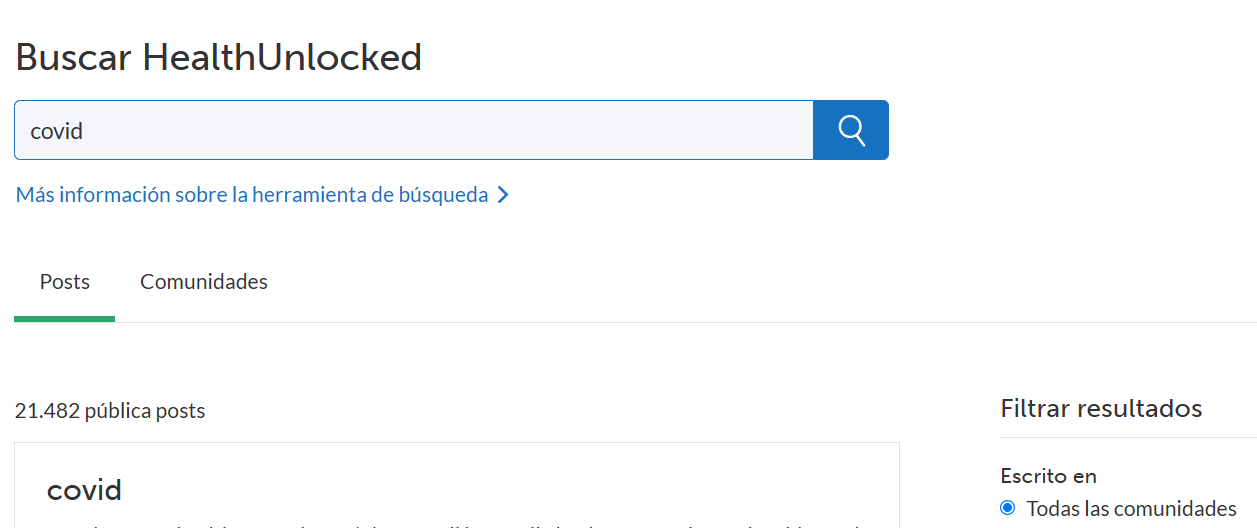

### Lungs, trovare covid

In [8]:
df_l_su_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_lungs_type_interaction.csv", parse_dates = ["time"])
df_l_u_u = pd.read_csv("/home/deduce-ubuntu/Tesi/Tesi/bozze_df_analysis_sentiment/df_lungs_type_interaction_user_user_total.csv",  parse_dates = ["time"])

In [9]:
df_l = pd.concat([df_l_su_u, df_l_u_u])

In [10]:
df_l = df_l.drop_duplicates(["id", "text"])

In [13]:
df_l.shape

(410179, 19)

In [21]:
df_l[df_l["text"].str.lower().str.contains("covid")].shape

(6010, 19)

In [11]:
df_l[(df_l["text"].str.lower().str.contains("covid")) & \
      (df_l["id"].str.startswith("p"))].shape

(1222, 19)

In [17]:
df_l = df_l[~ df_l["text_lemmatised"].isna()]
df_l["text_lemmatised"] = df_l["text_lemmatised"].apply(lambda x: ast.literal_eval(x))
df_l.shape

In [27]:
df_l.text.str.contains("covid").value_counts()

text
False    407352
True       2827
Name: count, dtype: int64

In [22]:
lda(df_l, 40)

Topic: 0 
Words: 0.097*"day" + 0.067*"week" + 0.058*"take" + 0.053*"2" + 0.053*"month" + 0.045*"3" + 0.044*"year" + 0.029*"4" + 0.029*"time" + 0.022*"6"

Topic: 1 
Words: 0.192*"great" + 0.090*"news" + 0.051*"free" + 0.050*"£" + 0.043*"sad" + 0.042*"cost" + 0.037*"cat" + 0.033*"laugh" + 0.030*"forget" + 0.023*"device"

Topic: 2 
Words: 0.061*"make" + 0.057*"photo" + 0.048*"line" + 0.039*"google" + 0.037*"sense" + 0.035*"useful" + 0.027*"allergy" + 0.026*"clean" + 0.022*"cool" + 0.021*"personal"

Topic: 3 
Words: 0.111*"problem" + 0.062*"check" + 0.059*"doctor" + 0.048*"effect" + 0.041*"worth" + 0.037*"cause" + 0.034*"med" + 0.031*"drug" + 0.030*"prescribe" + 0.030*"take"

Topic: 4 
Words: 0.058*"sleep" + 0.052*"night" + 0.046*"morning" + 0.042*"say" + 0.039*"go" + 0.039*"tell" + 0.034*"bed" + 0.032*"day" + 0.020*"hour" + 0.015*"wake"

Topic: 5 
Words: 0.230*"love" + 0.107*"christmas" + 0.099*"lol" + 0.080*"beautiful" + 0.055*"xx" + 0.046*"picture" + 0.032*"please" + 0.025*"fantastic" +

#### Altro

In [67]:
lda(df_a[(df_a["change_sentiment"] == True) & (df_a["is_su"] == True) & (~ df_a["text_lemmatised"].isna())], 15)

Topic: 0 
Words: 0.029*"feel" + 0.019*"know" + 0.018*"bad" + 0.015*"think" + 0.014*"not" + 0.012*"thing" + 0.011*"attack" + 0.010*"asthma" + 0.009*"find" + 0.009*"hard"

Topic: 1 
Words: 0.037*"test" + 0.028*"allergy" + 0.025*"blood" + 0.017*"allergic" + 0.014*"level" + 0.011*"food" + 0.011*"high" + 0.011*"check" + 0.010*"eye" + 0.009*"take"

Topic: 2 
Words: 0.052*"health" + 0.026*"work" + 0.019*"medical" + 0.017*"risk" + 0.017*"patient" + 0.013*"condition" + 0.013*"nhs" + 0.012*"consider" + 0.010*"provide" + 0.010*"advice"

Topic: 3 
Words: 0.026*"help" + 0.019*"problem" + 0.018*"reflux" + 0.016*"cause" + 0.016*"try" + 0.014*"eat" + 0.014*"cough" + 0.013*"night" + 0.013*"exercise" + 0.013*"asthma"

Topic: 4 
Words: 0.067*"inhaler" + 0.026*"ventolin" + 0.026*"need" + 0.022*"medication" + 0.016*"take" + 0.015*"blue" + 0.015*"preventer" + 0.014*"work" + 0.012*"try" + 0.012*"reliever"

Topic: 5 
Words: 0.032*"air" + 0.025*"trigger" + 0.019*"cold" + 0.017*"dust" + 0.015*"house" + 0.014*"p

#### TEST LDA

In [95]:
dictionary = corpora.Dictionary(df_a['text_lemmatised'])

# Filter out words that occur less than 5 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in df_a['text_lemmatised']]

# Train the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=15,      #10 è buono già
                     passes=10,
                     random_state=42)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

Topic: 0 
Words: 0.029*"feel" + 0.019*"know" + 0.018*"bad" + 0.015*"think" + 0.014*"not" + 0.012*"thing" + 0.011*"attack" + 0.010*"asthma" + 0.009*"find" + 0.009*"hard"

Topic: 1 
Words: 0.037*"test" + 0.028*"allergy" + 0.025*"blood" + 0.017*"allergic" + 0.014*"level" + 0.011*"food" + 0.011*"high" + 0.011*"check" + 0.010*"eye" + 0.009*"take"

Topic: 2 
Words: 0.052*"health" + 0.026*"work" + 0.019*"medical" + 0.017*"risk" + 0.017*"patient" + 0.013*"condition" + 0.013*"nhs" + 0.012*"consider" + 0.010*"provide" + 0.010*"advice"

Topic: 3 
Words: 0.026*"help" + 0.019*"problem" + 0.018*"reflux" + 0.016*"cause" + 0.016*"try" + 0.014*"eat" + 0.014*"cough" + 0.013*"night" + 0.013*"exercise" + 0.013*"asthma"

Topic: 4 
Words: 0.067*"inhaler" + 0.026*"ventolin" + 0.026*"need" + 0.022*"medication" + 0.016*"take" + 0.015*"blue" + 0.015*"preventer" + 0.014*"work" + 0.012*"try" + 0.012*"reliever"

Topic: 5 
Words: 0.032*"air" + 0.025*"trigger" + 0.019*"cold" + 0.017*"dust" + 0.015*"house" + 0.014*"p